In [ ]:
'''
Dataframe of top 49 highest grossing profit movies from wikipedia 
'''

In [196]:
HighestGrossProfit

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit,Year
0,1.0,Avengers: Endgame,Adventure,After the devastating events of Avengers: Infi...,356000000.0,2.797801e+09,2.441801e+09,2019
1,2.0,Avatar,Action,"In the 22nd century, a paraplegic Marine is di...",237000000.0,2.787965e+09,2.550965e+09,2009
2,3.0,Titanic,Drama,101-year-old Rose DeWitt Bukater tells the sto...,200000000.0,1.845034e+09,1.645034e+09,1997
3,4.0,Star Wars: The Force Awakens,Action,Thirty years after defeating the Galactic Empi...,245000000.0,2.068224e+09,1.823224e+09,2015
4,5.0,Avengers: Infinity War,Adventure,As the Avengers and their allies have continue...,300000000.0,2.046240e+09,1.746240e+09,2018
5,6.0,Jurassic World,Action,Twenty-two years after the events of Jurassic ...,150000000.0,1.671713e+09,1.521713e+09,2015
6,7.0,The Lion King,Adventure,"Simba idolizes his father, King Mufasa, and ta...",260000000.0,1.656943e+09,1.396943e+09,2019
7,8.0,The Avengers,Science Fiction,When an unexpected enemy emerges and threatens...,220000000.0,1.519558e+09,1.299558e+09,2012
8,9.0,Furious 7,Action,Deckard Shaw seeks revenge against Dominic Tor...,190000000.0,1.506249e+09,1.316249e+09,2015
9,10.0,Frozen II,Animation,"Elsa, Anna, Kristoff and Olaf head far into th...",33000000.0,1.330765e+09,1.297765e+09,2019


In [1]:
'''
Highest gross profit movies by genre percentage total 
'''

'\nHighest gross profit movies by genre percentage total \n'

{'Animation': 10.204081632653061, 'Action': 38.775510204081634, 'Fantasy': 4.081632653061225, 'Crime': 2.0408163265306123, 'Adventure': 30.612244897959183, 'Drama': 4.081632653061225, 'Romance': 2.0408163265306123, 'Science Fiction': 4.081632653061225, 'Family': 4.081632653061225}


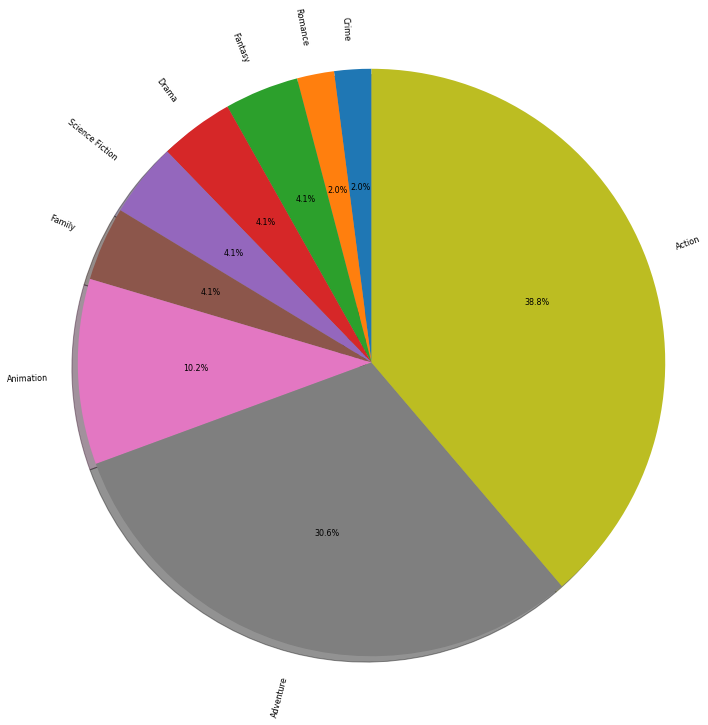

In [107]:
genre_percent(dfHighestGrossProfitGenre)

In [ ]:
'''
Highest gross profit movies' Budget, Revenue and Gross Profit summary statistics
'''

In [52]:
HighestGrossProfit[["Budget"]].describe()
#HighestGrossProfit[["Budget"]].describe().to_csv('HighestGrossProfitBudget.csv', index = True)

,Budget
count,4.900000e+01
mean,1.827755e+08
std,7.846450e+07
min,2.500000e+07
25%,1.500000e+08
50%,2.000000e+08
75%,2.370000e+08
max,3.800000e+08


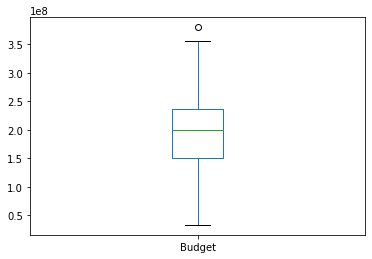

In [104]:
HighestGrossProfit[["Budget"]].plot.box();
#plt.savefig('gpbbp.png')

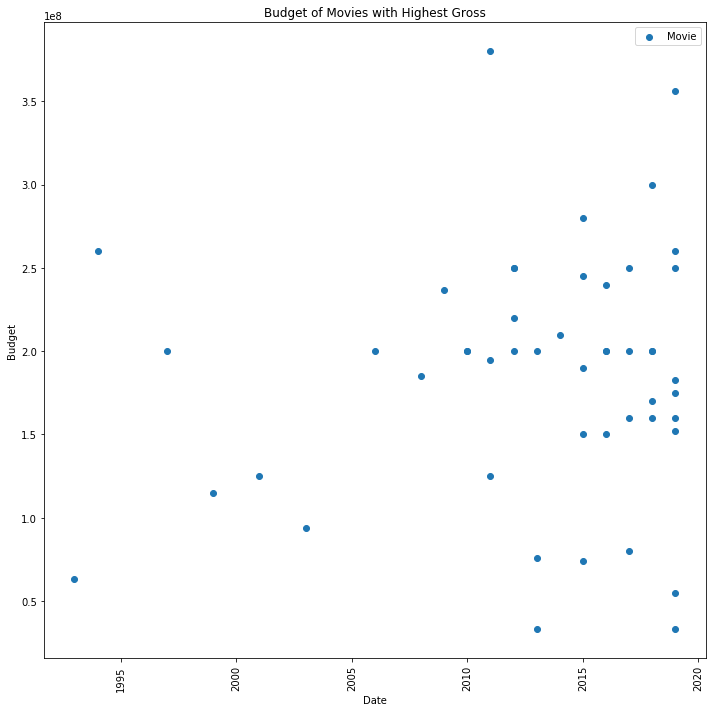

In [105]:
# Set the figure size in inches
plt.figure(figsize=(8,6))

plt.scatter(HighestGrossProfitYear, HighestGrossProfitBudget,label = "Movie" )

# Set x and y axes labels and title
plt.xlabel('Date')
plt.xticks( rotation=90, fontsize=10);
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.ylabel('Budget')

plt.title('Budget of Movies with Highest Gross')
plt.legend()
plt.tight_layout()
#plt.savefig('gpbsp.png')

In [70]:
HighestGrossProfit[["Revenue"]].describe()

,Revenue
count,4.900000e+01
mean,1.297434e+09
std,4.119703e+08
min,9.201000e+08
25%,1.056057e+09
50%,1.131928e+09
75%,1.341511e+09
max,2.797801e+09


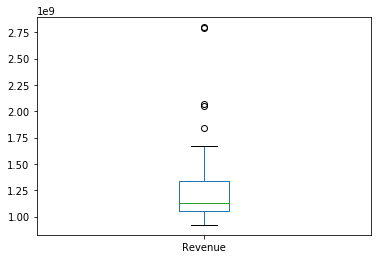

In [109]:
HighestGrossProfit[["Revenue"]].plot.box();
#plt.savefig('gprbp.png')

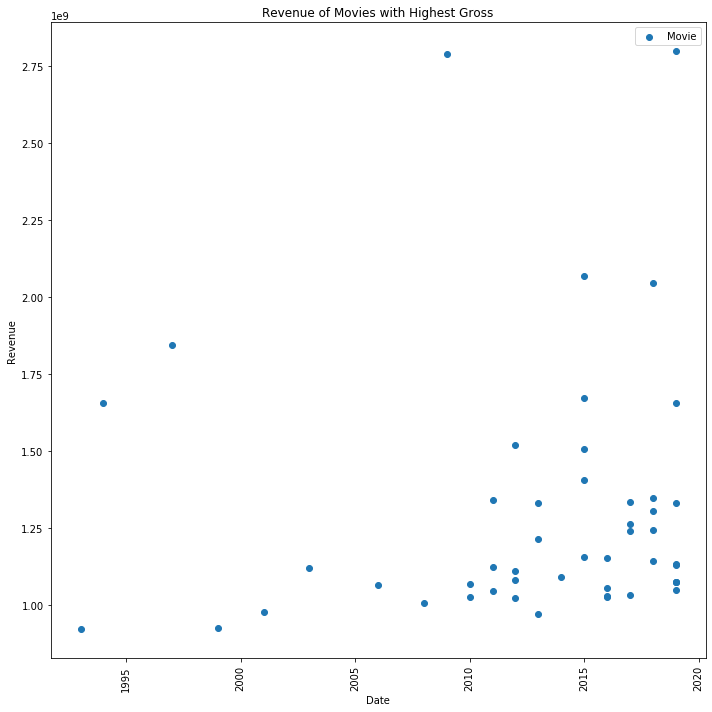

In [110]:
# Set the figure size in inches
plt.figure(figsize=(8,6))

plt.scatter(HighestGrossProfitYear, HighestGrossProfitRevenue,label = "Movie" )

# Set x and y axes labels and title
plt.xlabel('Date')
plt.xticks( rotation=90, fontsize=10);

plt.ylabel('Revenue')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Revenue of Movies with Highest Gross')
plt.legend()
plt.tight_layout()
#plt.savefig('gprsp.png')

In [74]:
HighestGrossProfit[["Gross Profit"]].describe()

,Gross Profit
count,4.900000e+01
mean,1.111903e+09
std,3.862758e+08
min,6.657138e+08
25%,8.656598e+08
50%,9.836892e+08
75%,1.216511e+09
max,2.550965e+09


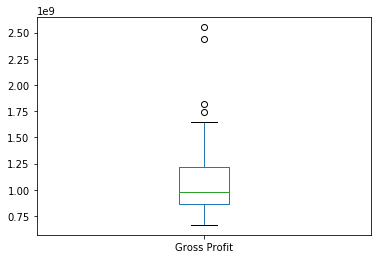

In [111]:
HighestGrossProfit[["Gross Profit"]].plot.box();
#plt.savefig('gpbp.png')

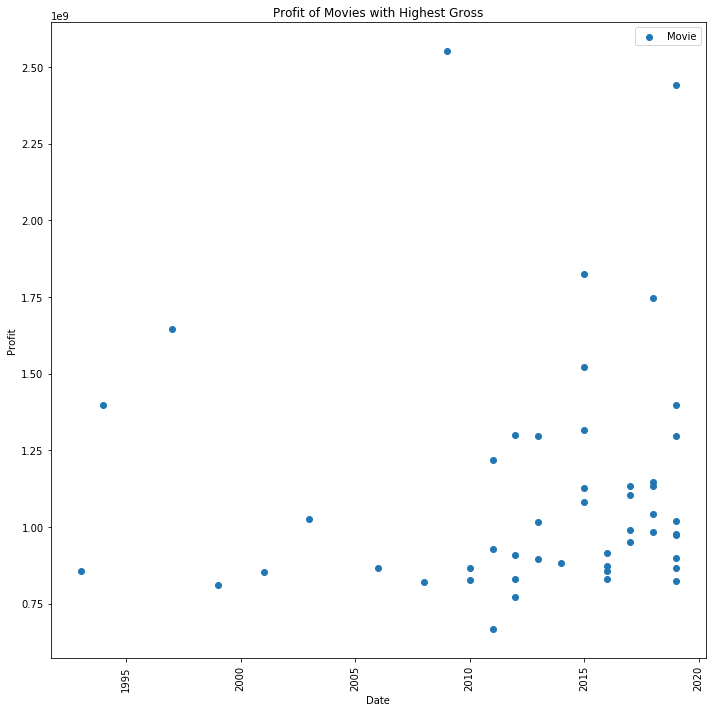

In [112]:
# Set the figure size in inches
plt.figure(figsize=(8,6))

plt.scatter(HighestGrossProfitYear, HighestGrossProfitGrossProfit,label = "Movie" )

# Set x and y axes labels and title
plt.xlabel('Date')
plt.xticks( rotation=90, fontsize=10);
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.ylabel('Profit')

plt.title('Profit of Movies with Highest Gross')
plt.legend()
plt.tight_layout()
#plt.savefig('gpsp.png')

In [ ]:
'''
Counts the most common 50 words in the total Highest Gross Profit movies' decriptions
'''

C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


[('the', 165), ('to', 88), ('and', 75), ('of', 70), ('a', 61), ('his', 38), ('is', 28), ('in', 25), ('from', 21), ('with', 20), ('an', 19), ('for', 18), ('as', 15), ('her', 13), ('that', 13), ('by', 12), ('on', 11), ('new', 11), ('world', 11), ('help', 10), ('With', 9), ('she', 9), ('have', 8), ('into', 8), ('their', 7), ('has', 7), ('all', 7), ('will', 7), ('The', 7), ('about', 7), ('he', 7), ('-', 6), ('him', 6), ('remaining', 5), ('once', 5), ('be', 5), ('years', 5), ('after', 5), ('up', 5), ('former', 5), ('battle', 5), ('finds', 5), ('go', 5), ('who', 5), ('while', 5), ('at', 5), ('events', 4), ('Avengers', 4), ('what', 4), ('but', 4), ('between', 4), ('young', 4), ('Meanwhile,', 4), ('Jack', 4), ('first', 4), ('one', 4), ('been', 4), ('takes', 4), ('But', 4), ('heir', 4), ('plans', 4), ('out', 4), ('take', 4), ('learn', 4), ('are', 4), ('soon', 4), ('home', 4), ('However,', 4), ('dinosaurs', 4), ('park', 4), ('woman', 4), ('mysterious', 4), ('most', 4), ('--', 4), ('or', 4), ('po

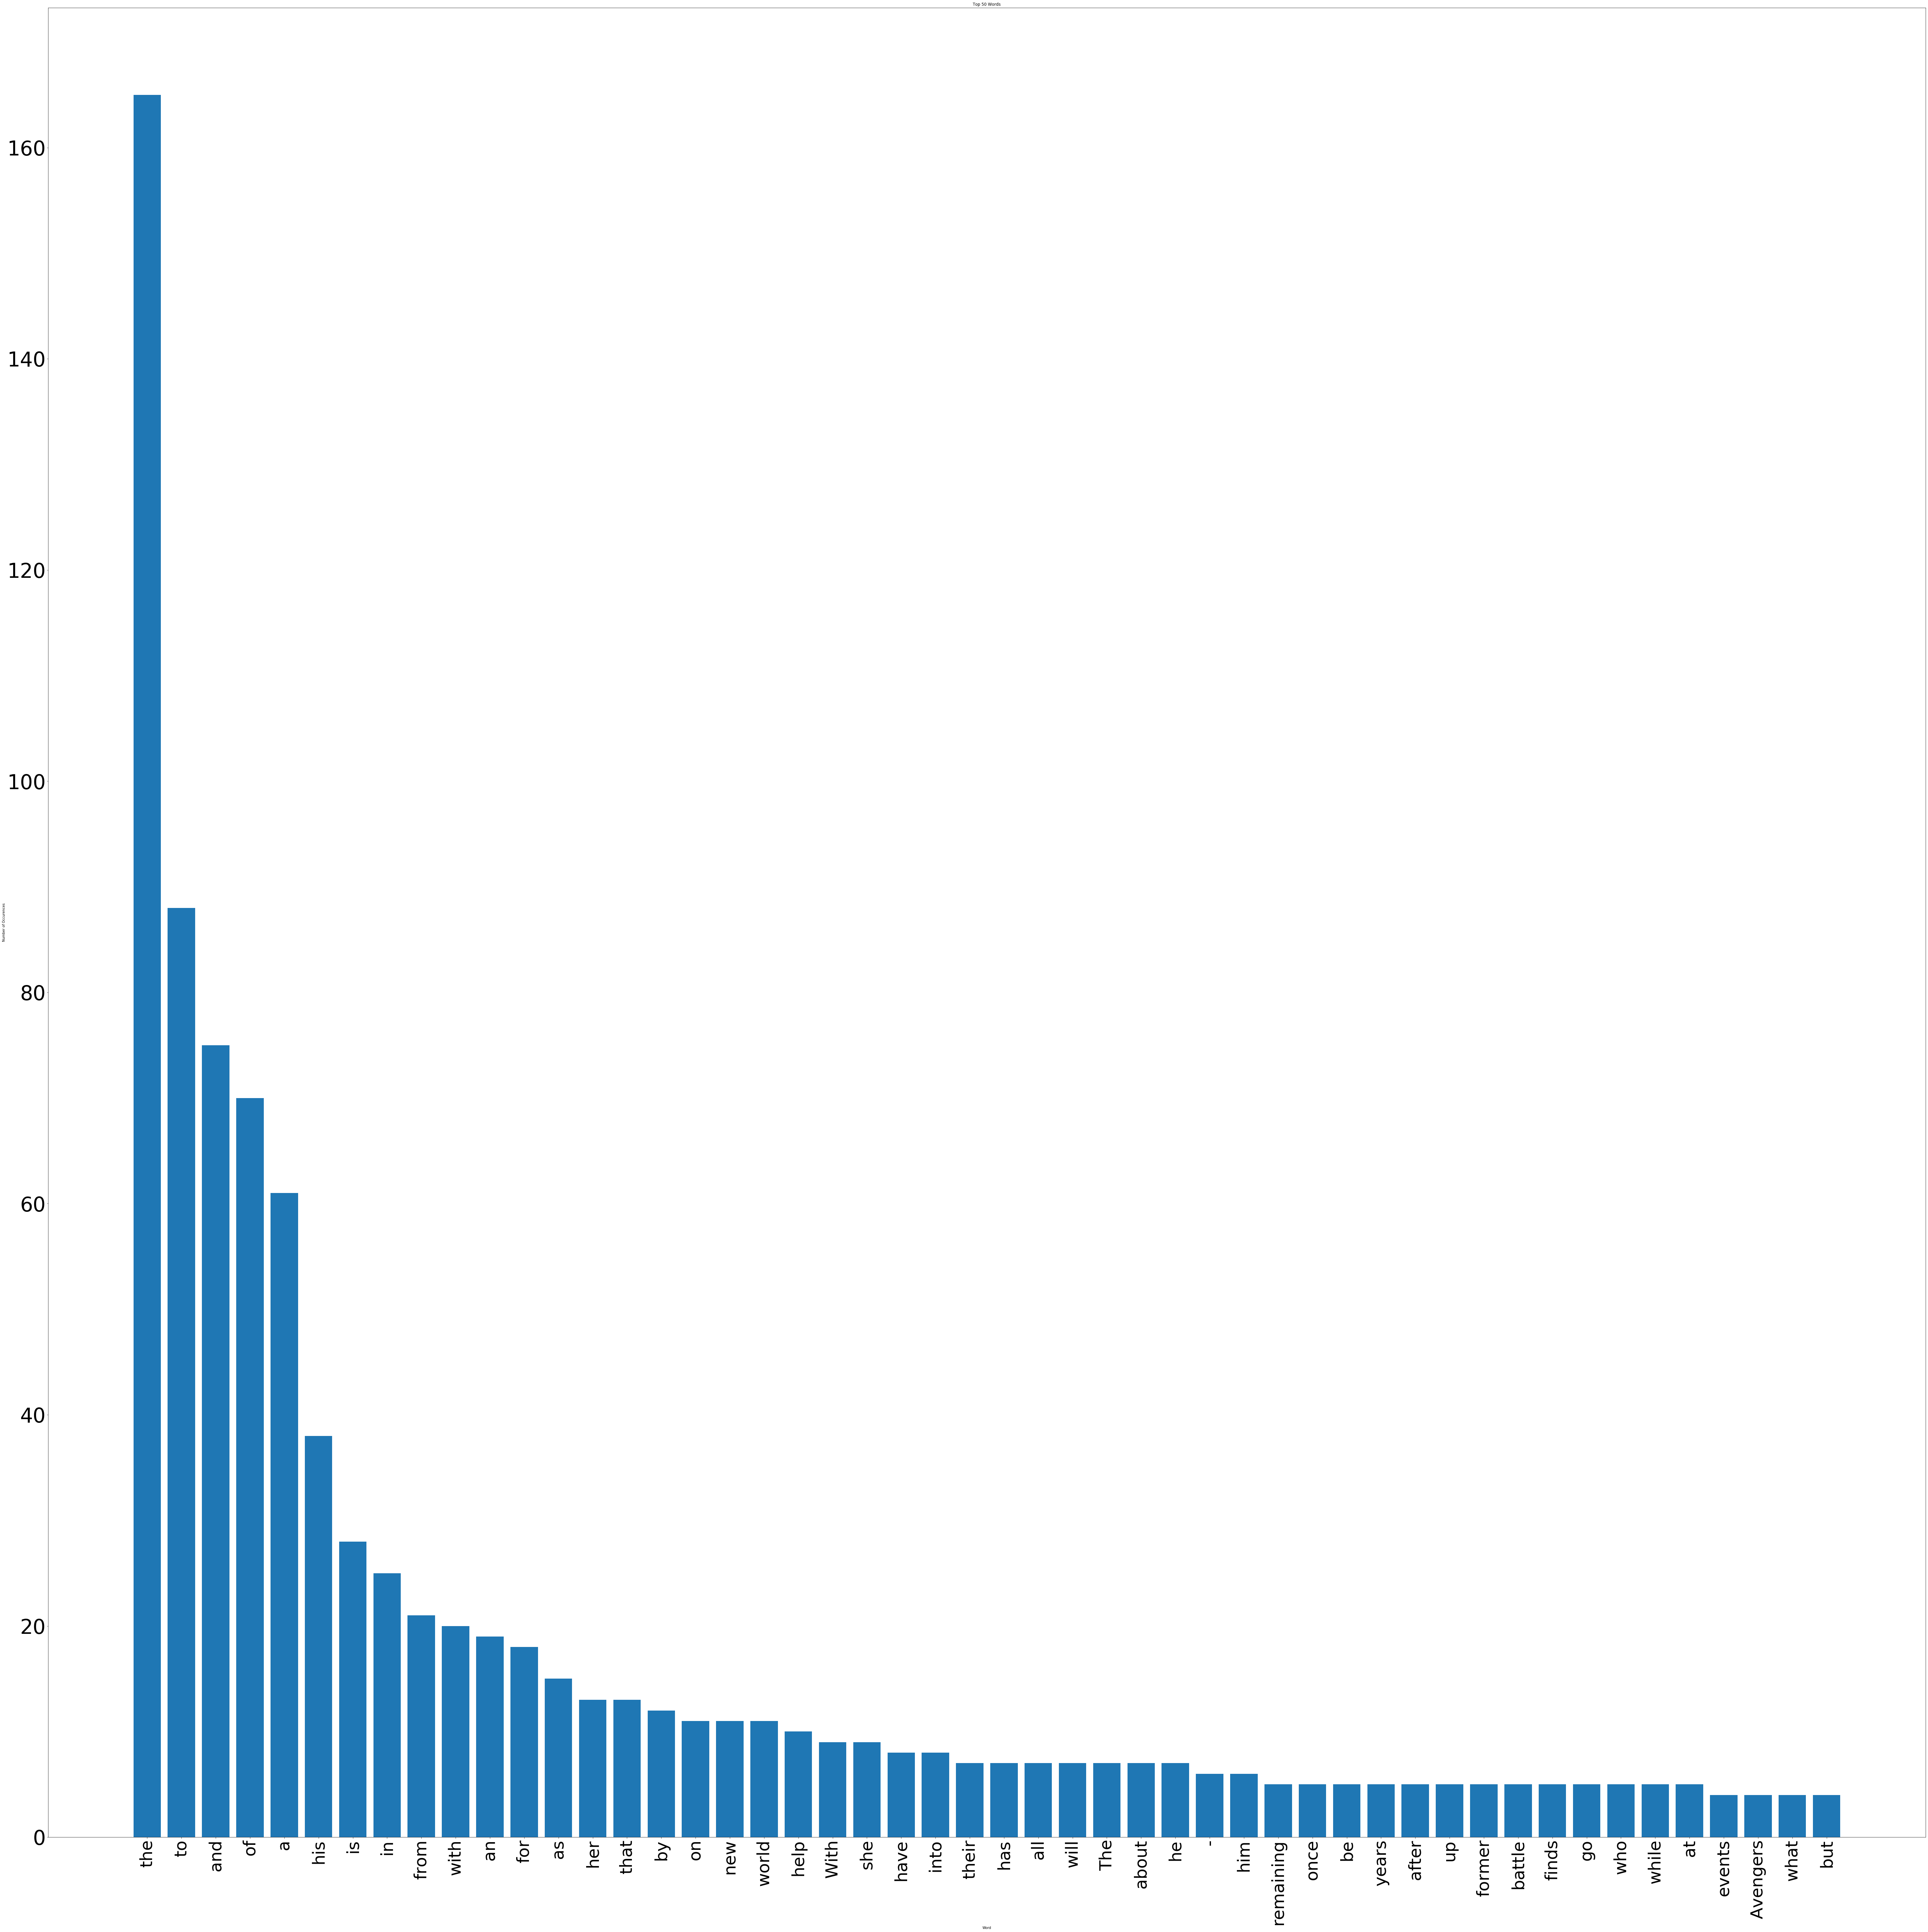

In [54]:
word_count(HighestGrossProfit)


In [ ]:
'''
Dataframe of top 115 movies that recieved the most awards from wikipedia 
'''

In [79]:
MostAwards

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit,"(Academy Awards Season, Year in Film)",Number of Awards Won
0,1.0,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,25953012.2,1.717304e+08,1.457774e+08,1927–1928,3
1,2.0,Tequila Sunrise,Action,"In a seaside California town, best friends Mac...",23000000.0,1.717304e+08,1.487304e+08,1927–1928,3
2,3.0,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,25953012.2,1.717304e+08,1.457774e+08,1928–1929,1
3,4.0,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",379000.0,4.358000e+06,3.979000e+06,1928–1929,1
4,5.0,Coquette,Drama,A Southern belle's flirtation with a working m...,25953012.2,1.717304e+08,1.457774e+08,1928–1929,1
...,...,...,...,...,...,...,...,...,...
111,112.0,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",30000000.0,4.454357e+08,4.154357e+08,2016,6
112,113.0,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",19500000.0,1.949897e+08,1.754897e+08,2017,4
113,114.0,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",52000000.0,8.940275e+08,8.420275e+08,2018,4
114,115.0,Parasite,Horror,Paul Dean has created a deadly parasite that i...,800000.0,7.000000e+06,6.200000e+06,2019,4


In [ ]:
'''
Most Awards movies by genre percentage total 
'''

{'Animation': 0.8695652173913043, 'Action': 8.695652173913043, 'Crime': 6.086956521739131, 'Horror': 0.8695652173913043, 'Adventure': 9.565217391304348, 'History': 2.608695652173913, 'Comedy': 10.434782608695652, 'Drama': 57.391304347826086, 'Romance': 0.8695652173913043, 'Western': 1.7391304347826086, 'Science Fiction': 0.8695652173913043}


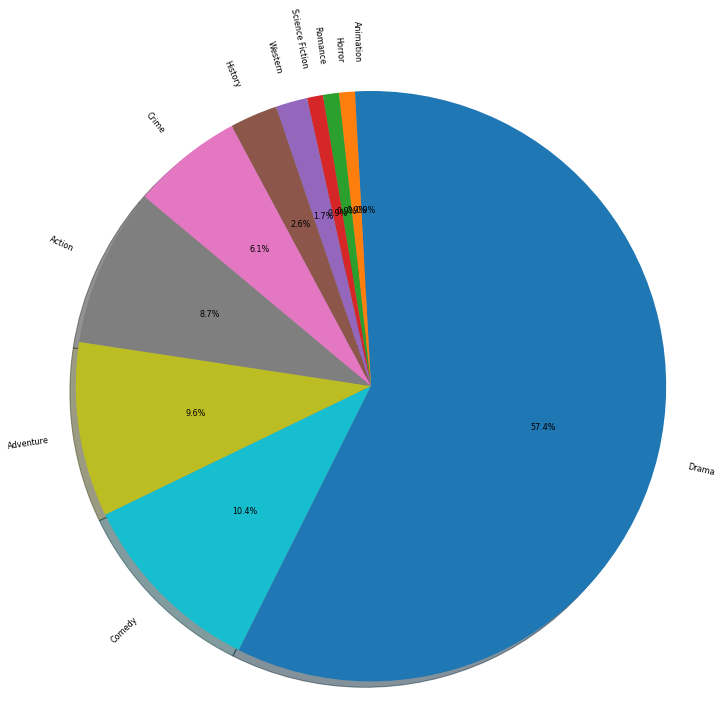

In [105]:
genre_percent(MostAwardsGenre)

In [ ]:
'''
Most Awards movies' Budget, Revenue and Gross Profit summary statistics
'''

In [81]:
MostAwards[["Budget"]].describe()

,Budget
count,1.150000e+02
mean,2.978954e+07
std,4.244214e+07
min,1.000000e+00
25%,3.850000e+06
50%,1.500000e+07
75%,2.595301e+07
max,2.070000e+08


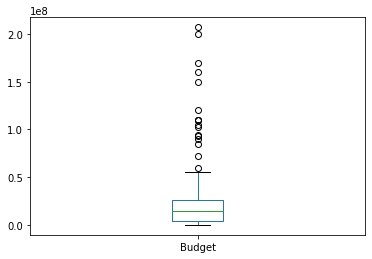

In [125]:
MostAwards[["Budget"]].plot.box();
#plt.savefig('mabbp.png')

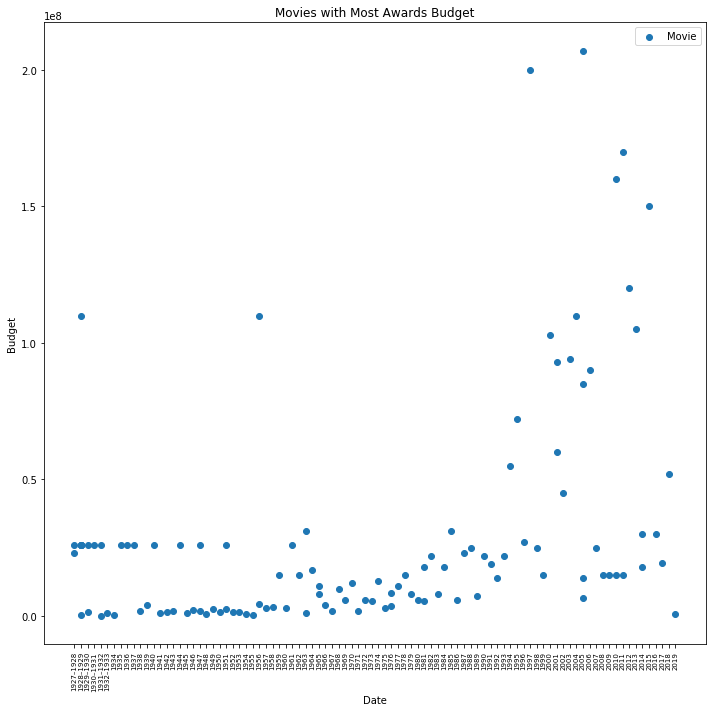

In [126]:
# Set the figure size in inches
plt.figure(figsize=(8,6))

plt.scatter(MostAwardsYear, MostAwardsBudget,label = "Movie" )

# Set x and y axes labels and title
plt.xlabel('Date')
plt.xticks( rotation=90, fontsize=7);

plt.ylabel('Budget')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Movies with Most Awards Budget')
plt.legend()
plt.tight_layout()
#plt.savefig('mabsp.png')

In [280]:
MostAwards[["Revenue"]].describe()

,Revenue
count,1.150000e+02
mean,2.056880e+08
std,2.616434e+08
min,1.504380e+05
25%,4.382053e+07
50%,1.622430e+08
75%,2.126472e+08
max,1.845034e+09


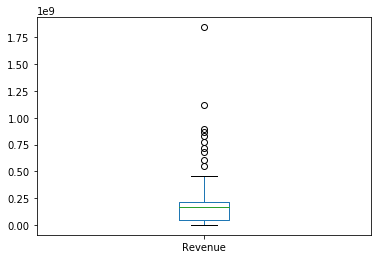

In [127]:
MostAwards[["Revenue"]].plot.box();
#plt.savefig('marbp.png')

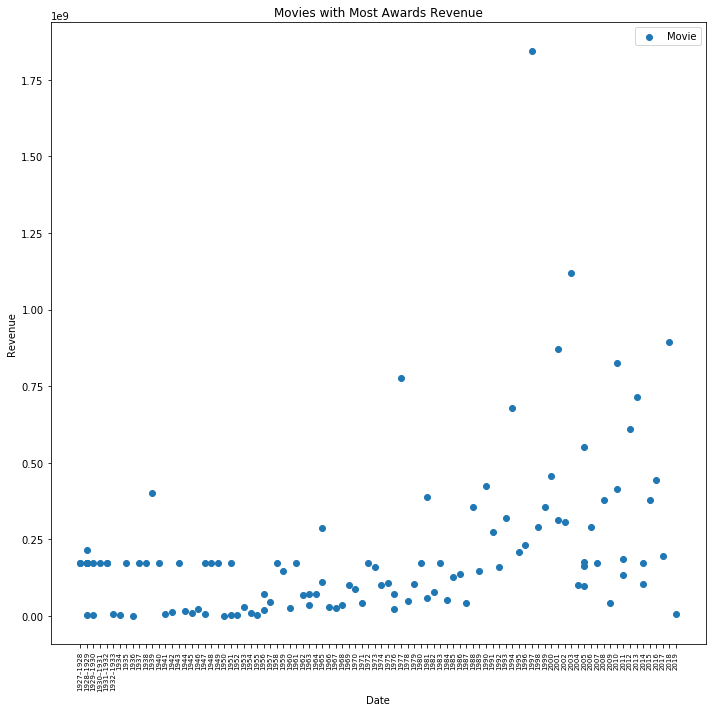

In [128]:
# Set the figure size in inches
plt.figure(figsize=(8,6))

plt.scatter(MostAwardsYear, MostAwardsRevenue,label = "Movie" )

# Set x and y axes labels and title
plt.xlabel('Date')
plt.xticks( rotation=90, fontsize=7);

plt.ylabel('Revenue')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Movies with Most Awards Revenue')
plt.legend()
plt.tight_layout()
#plt.savefig('marsp.png')

In [281]:
MostAwards[["Gross Profit"]].describe()

,Gross Profit
count,1.150000e+02
mean,1.758411e+08
std,2.368487e+08
min,-3.782110e+07
25%,2.792500e+07
50%,1.380000e+08
75%,1.740737e+08
max,1.645034e+09


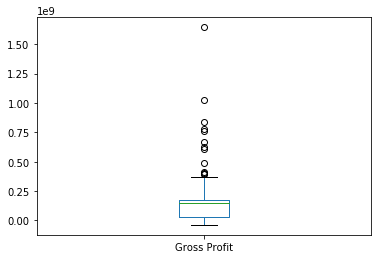

In [129]:
MostAwards[["Gross Profit"]].plot.box();
#plt.savefig('magpbp.png')

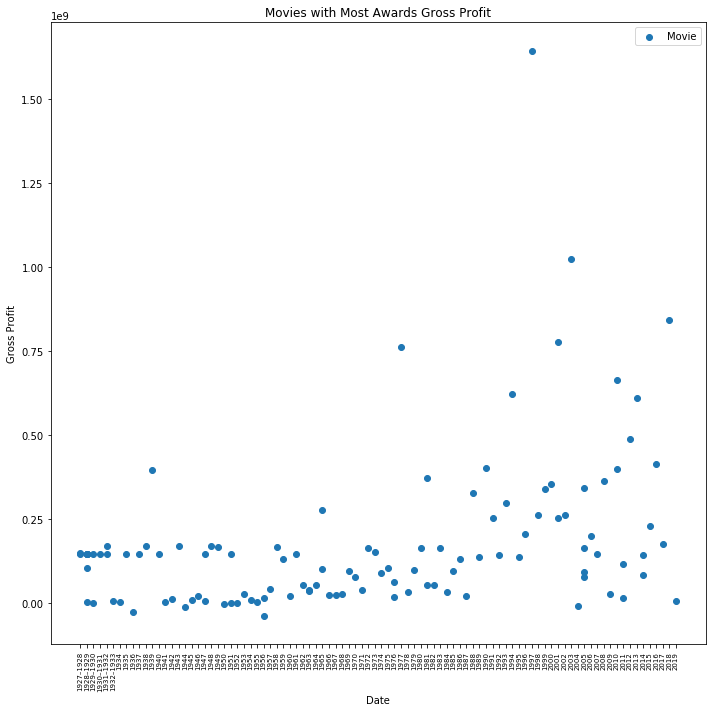

In [130]:
# Set the figure size in inches
plt.figure(figsize=(8,6))

plt.scatter(MostAwardsYear, MostAwardsGrossProfit,label = "Movie" )

# Set x and y axes labels and title
plt.xlabel('Date')
plt.xticks( rotation=90, fontsize=7);

plt.ylabel('Gross Profit')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Movies with Most Awards Gross Profit')
plt.legend()
plt.tight_layout()
#plt.savefig('magpsp.png')

In [90]:
'''
Counts the most common 50 words in the total Most Awards movies' decriptions
'''

"\nCounts the most common 50 words in the total Most Awards movies' decriptions\n"

C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


[('the', 320), ('a', 204), ('of', 188), ('to', 176), ('and', 170), ('his', 102), ('in', 96), ('is', 73), ('with', 55), ('for', 41), ('he', 36), ('an', 33), ('by', 32), ('their', 31), ('on', 30), ('who', 26), ('as', 24), ('her', 23), ('into', 21), ('that', 21), ('but', 21), ('be', 20), ('from', 19), ('at', 19), ('life', 18), ('story', 15), ('they', 15), ('has', 14), ('family', 14), ('when', 13), ('love', 13), ('up', 13), ('young', 13), ('are', 12), ('take', 12), ('one', 12), ('she', 12), ('find', 12), ('way', 12), ('while', 11), ('But', 11), ('other', 11), ('becomes', 11), ('two', 11), ('lives', 10), ('New', 10), ('him', 10), ('The', 9), ('more', 9), ('man', 9), ('War', 9), ('during', 9), ('tells', 8), ('where', 8), ('himself', 8), ('must', 8), ('through', 8), ('As', 8), ('friends', 7), ('--', 7), ('about', 7), ('each', 7), ('them', 7), ('it', 7), ('out', 7), ('against', 7), ('World', 7), ('just', 7), ('English', 7), ('He', 7), ('being', 6), ('not', 6), ('new', 6), ('finds', 6), ('beaut

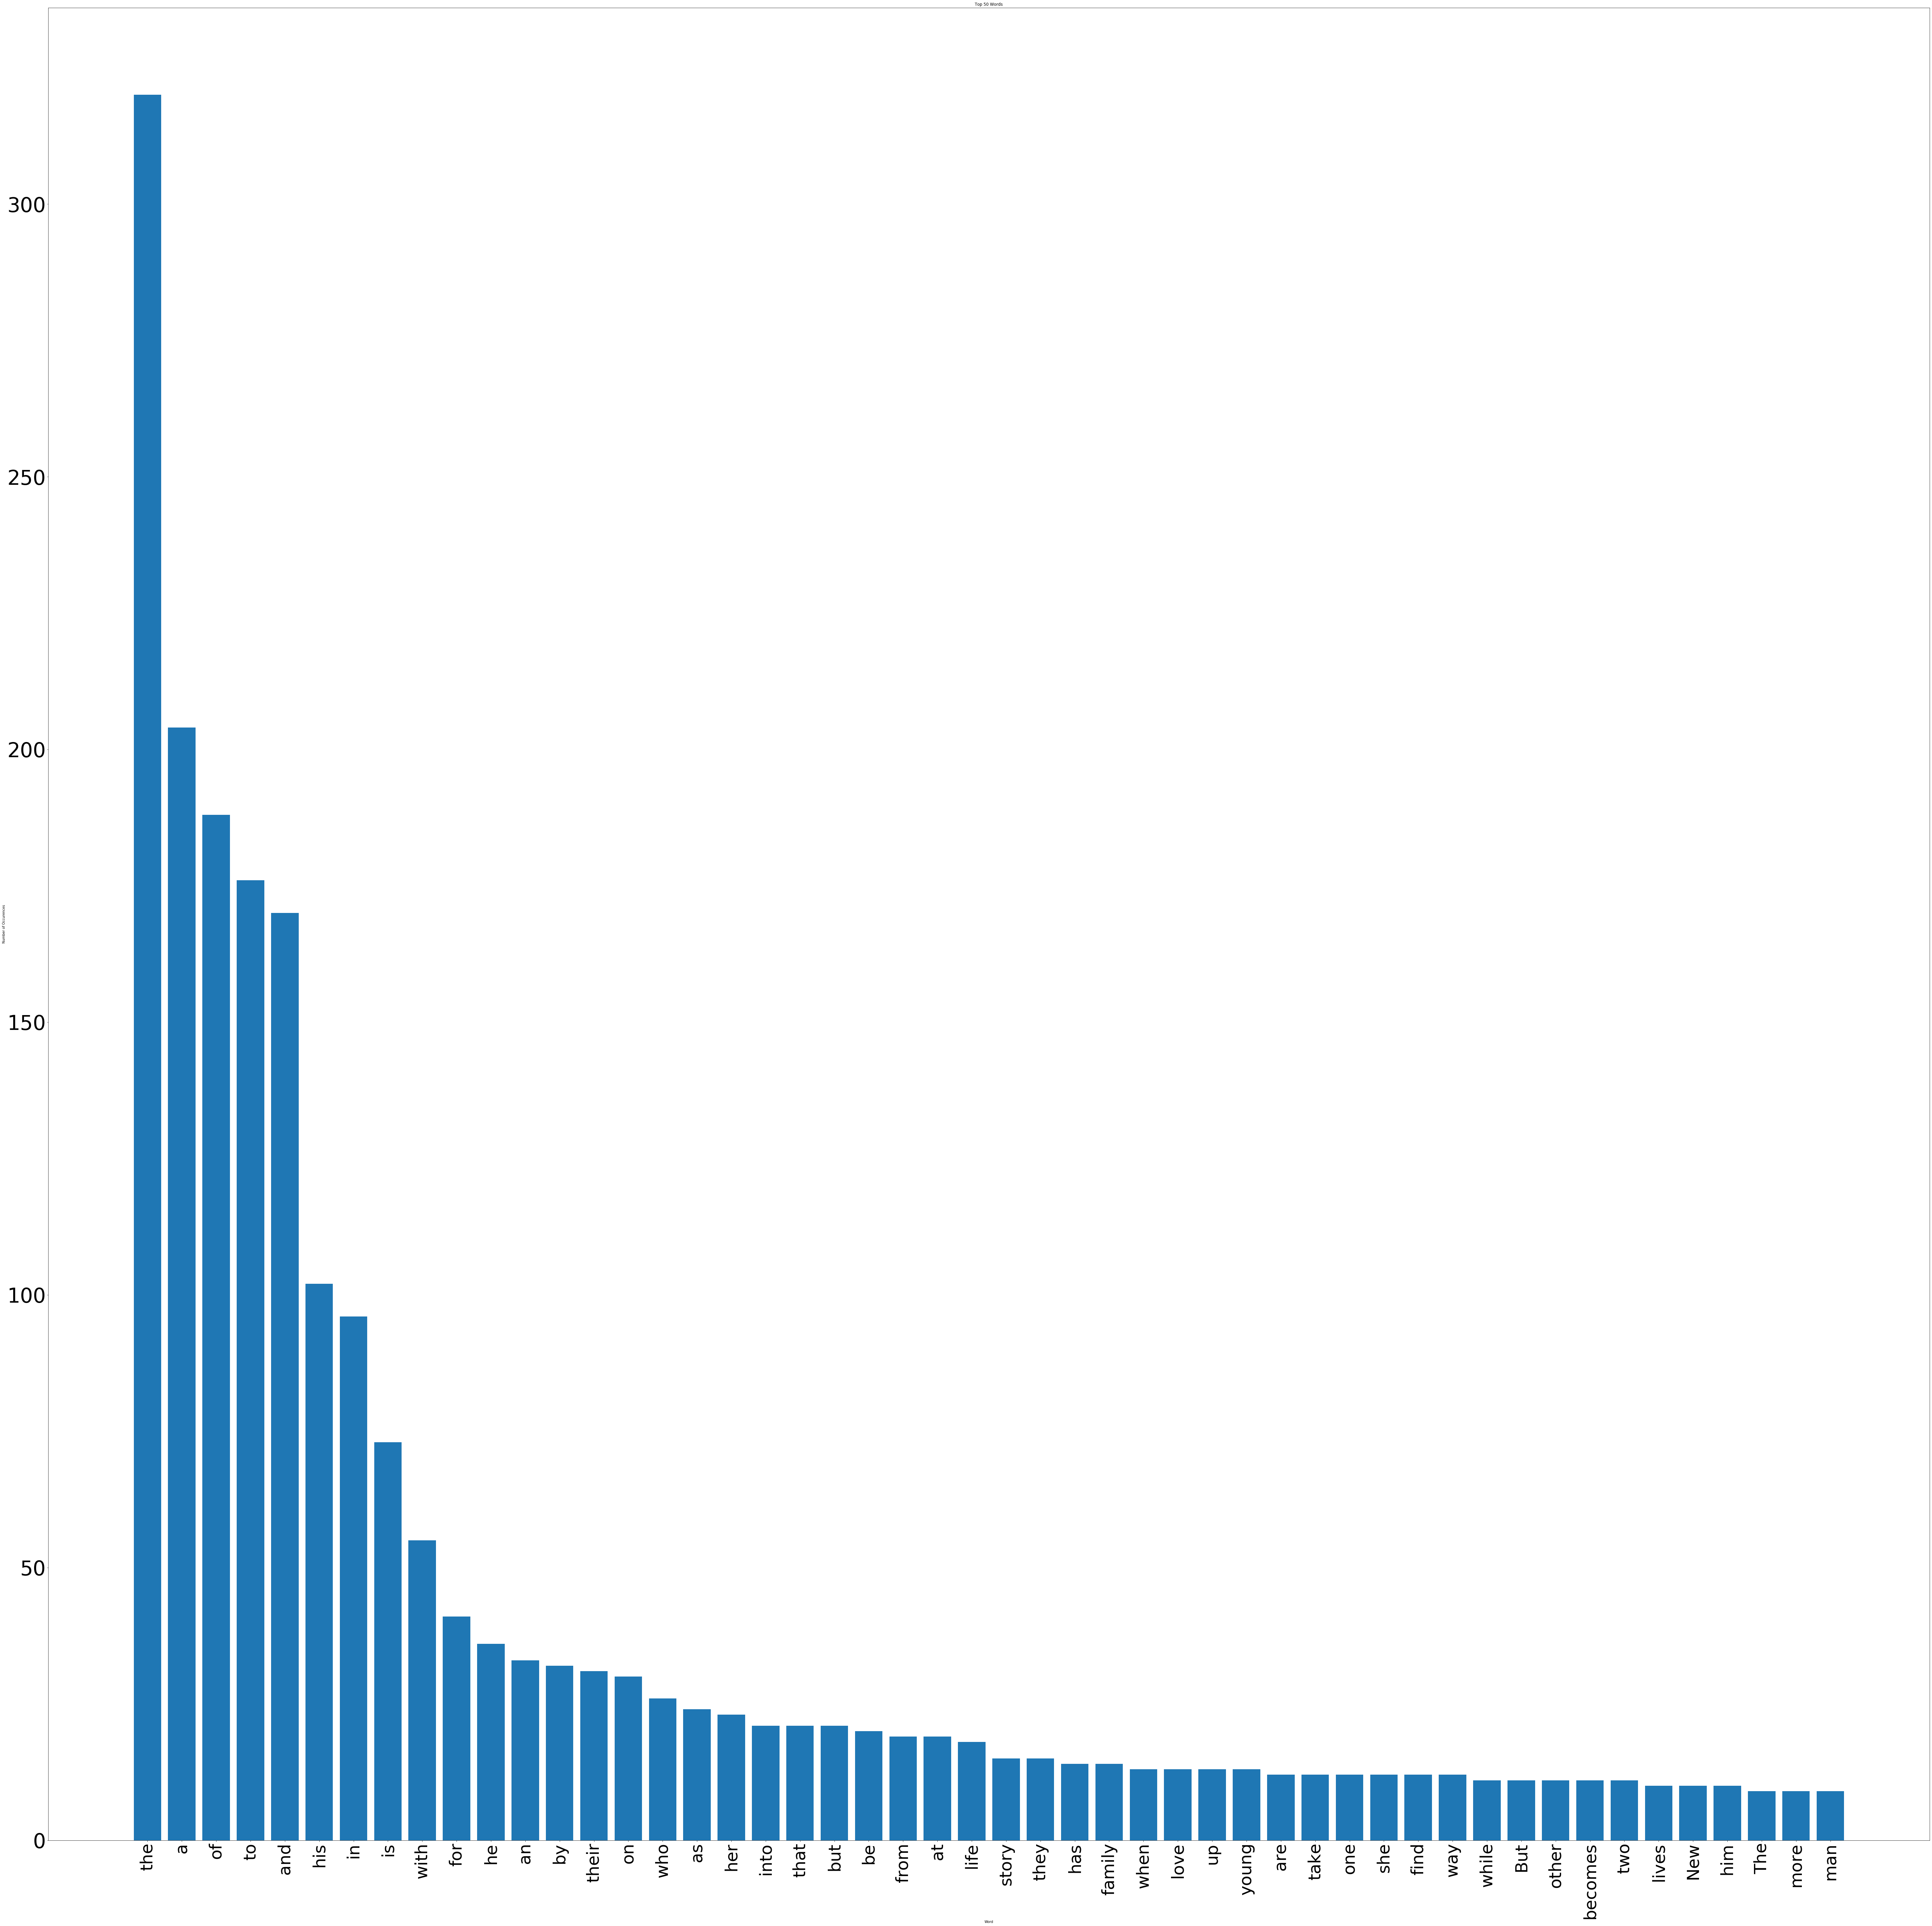

In [137]:
word_count(MostAwards)

In [ ]:
'''
From the Most Awards dataframe, determines whether a correlation between Number of Awards won and the respective
Gross Profit is apparent
'''

                      Number of Awards Won  Gross Profit
Number of Awards Won              1.000000      0.256772
Gross Profit                      0.256772      1.000000
----
Correlation Coefficient:0.2567723127311073


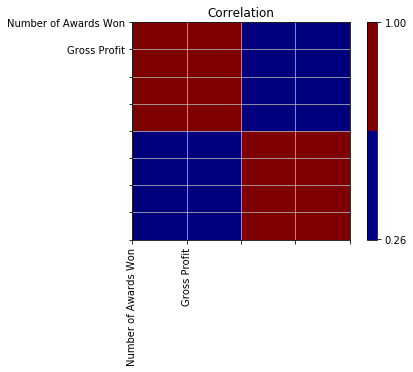

Mean
Number of Awards Won    4.965217e+00
Gross Profit            1.772830e+08
dtype: float64
----
Median
Number of Awards Won            5.0
Gross Profit            138000000.0
dtype: float64
----
Mode
   Number of Awards Won  Gross Profit
0                   4.0  1.464710e+08
----
Standard Deviation
Number of Awards Won    2.176148e+00
Gross Profit            2.357390e+08
dtype: float64
----
Covariance
                      Number of Awards Won  Gross Profit
Number of Awards Won          4.735622e+00  1.317250e+08
Gross Profit                  1.317250e+08  5.557288e+16
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA2CCFAAC8>
Gross Profit Skewness = 3.1679501502201757
Gross Profit Kurtosis = 13.580287004263901
Number of Awards Won Skewness = 0.5525682592670546
Number of Awards Won Kurtosis = 0.3768109112307041


'\n.25 is a low degree of correlation. \n\n\n'

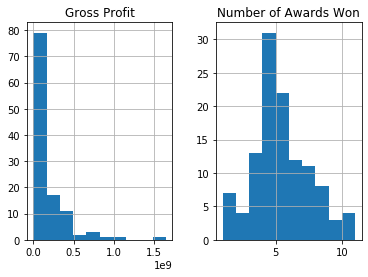

In [47]:
# relationship between number of awards with gross profit


import pandas as pd

y=MostAwards["Number of Awards Won"].drop(index=115)
x=MostAwards["Gross Profit"].drop(index=115)
x=x.abs()



Data=(y,x)
#print(Data)
df=pd.DataFrame(Data)
df=df.T


df=df.astype(float)
print(df.corr())
x=df["Number of Awards Won"].corr(df["Gross Profit"])
print('----')
print(f"Correlation Coefficient:{x}")

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 2)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation')
    labels=["Number of Awards Won","Gross Profit"]
    ax1.set_xticklabels(labels,fontsize=10,rotation=90)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.26,1])
    #plt.savefig('magpcm.png')
    
    plt.show()
    print('Mean')
    print(df.mean(axis=0))
    print('----')
    print('Median')
    print(df.median())
    print('----')
    print('Mode')
    print(df.mode())
    print('----')
    print('Standard Deviation')
    print(df.std(axis=0))
    print('----')
    print('Covariance')
    print(df.cov())
    print(df.hist())
    from scipy.stats import kurtosis, skew
    print ('Gross Profit Skewness =', skew(df["Gross Profit"]))
    print ('Gross Profit Kurtosis =', kurtosis(df["Gross Profit"]))
    print ('Number of Awards Won Skewness =', skew(df["Number of Awards Won"]))
    print ('Number of Awards Won Kurtosis =', kurtosis(df["Number of Awards Won"]))
    

   
  
    

correlation_matrix(df)
'''
.25 is a low degree of correlation. 
Gross Profit Kurtosis is Leptokurtic, distribution is shorter, has thinner tails, and both a higher and thiner peak.  

Number of Awards Won Kurtosis is Platykurtic, distribution is longer, has fatter tails, and a both lower and broader peak. 
'''

In [68]:

y=df["Number of Awards Won"]
x=df["Gross Profit"]
Data=(y,x)

df=pd.DataFrame(Data)
df=df.T

mean = df.mean()
sd = df.std()


# Calculate z
z = (4 - mean)/sd
z


Number of Awards Won   -0.443544
Gross Profit           -0.751450
dtype: float64

In [71]:
import math
import scipy.stats as stats
p = 1 - stats.norm.cdf(z)
p

array([0.67131382, 0.77380906])

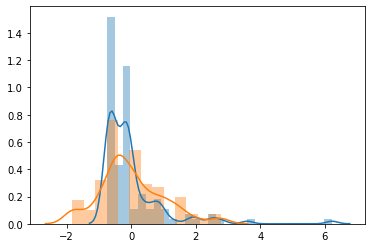

In [66]:
#Standardizing the distributions 
import seaborn as sns

g=df["Gross Profit"]
n=df["Number of Awards Won"]

    
sns.distplot([(x - g.mean())/g.std() for x in g]);
sns.distplot([(x - n.mean())/n.std() for x in n]);


In [5]:
#Functions

In [1]:
#passes a list of movies through the tmdb api and returns each movie title, genre, overview, budget and revenue
import requests
def tmdbapi(df):
    a=df.values.tolist()
    b=0
    c=0
    k=0
    listcount5=0
    listcount6=0
    g=[]
    h=[]
    for m in a:
        response1 = requests.get(f"https://api.themoviedb.org/3/search/movie?api_key=2b60ebb07fcf8235d5645c1474f2b129&query={m}")
        b+=1
        #listcount5+=1
        if b==len(a):
            break
        #print(listcount5)
        #print(response1)
        try:
            s=response1.json()['results'][0]['id']
            for i in range(0,len(a)):
                t = str(s)
                #listcount6+=1
                #print(listcount6)
                #print(t)
                g.append(t)
                break
        except IndexError:
            pass
    for i in range(0,len(g)):
        k=[]
        c+=1
        id = g[i]
        response2 = requests.get(f"https://api.themoviedb.org/3/movie/{id}?api_key=2b60ebb07fcf8235d5645c1474f2b129")
        k.append(c)
        #print(k)
        k.append(response2.json()['original_title'])
        #print(k)
        k.append(response2.json()['genres'][0]['name'])
        #print(k)
        k.append(response2.json()['overview'])
        h.append(k)
        k.append(response2.json()['budget'])
        #print(k)
        k.append(response2.json()['revenue'])
    
    return(h)

In [2]:
#Passes a list of movie descriptions and returns a word count of the most common words
def word_count(df):
    df1 = df['Description']
    csv_data = df1.to_csv()
    # Split the transcript into words
    words = csv_data.split()
    # Create a dictionary
    word_counts = {}
    # Iterate through the text
    for word in words:
        # Update word counts
        word_counts[word] = word_counts.get(word, 0) + 1 #Get previous entry, update by 1?
    # Convert to a list
    counts = list(word_counts.items())
    # Sort words by count
    top=sorted(counts, key = lambda x: x[1], reverse=True)
    top_50 = sorted(counts, key = lambda x: x[1], reverse=True)[:50]
    # Store word counts 
    y = [item[1] for item in top_50]
    # Create x-axis ticks
    X = np.arange(len(y))
    # Create figure object with size = 40x40
    plt.figure(figsize=(100,100))
    # Create Bar Graph
    plt.bar(X , y)
    # Use words as x-axis tick labels
    plt.xticks(X, [item[0] for item in top_50], size = 50, rotation=90);
    plt.yticks(size = 60);
    # Include descriptive titles and labels
    plt.ylabel('Number of Occurences')
    plt.xlabel('Word')
    plt.title('Top 50 Words')
    
    print(top)
    #plt.savefig('gpbg.png')

In [3]:
#Determines the percentage of each movie genre
import matplotlib.pyplot as plt

k=[]
def genre_percent(genres):
    s=set(genres)
    for i in s:
        df1 = genres.str.contains(f"{i}")#returns each time a genre appeared as True and the other times as False
        #print(df1)
        t = list(filter(lambda l: df1[l], range(len(df1))))#returns all times a genre appeared as True
        #print(t)
        variable=(len(t)/len(df1))*100#determines the genre pecentage from the total genres
        k.append(variable)
        
#         print(i)
#         print(f"{variable}%")
        
    
    # using zip() to convert lists to dictionary to order percentages so that slices of pie chart are numerically ordered
    r = dict(zip(s, k))
    print(r)
    from collections import OrderedDict
    d = OrderedDict(sorted(r.items(), key=lambda x: x[1]))
    #print(d)
    o=d.keys()
    h=d.values()
    
    labels = o
    sizes = h
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 8},rotatelabels=True)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    
    #plt.savefig('mapc.png')
    plt.tight_layout()



In [4]:
#Data Cleaning

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#Movies with highest Gross Profit from Wikipedia Dataframe
dfHighestGross= pd.read_html('https://en.wikipedia.org/wiki/List_of_highest-grossing_films')[0]
dfHighestGross

,Rank,Peak,Title,Worldwide gross,Year,Reference(s)
0,1,1,Avengers: Endgame,"$2,797,800,564",2019,[# 1][# 2]
1,2,1,Avatar,"$2,790,439,000",2009,[# 3][# 4]
2,3,1,Titanic,"$2,194,439,542",1997,[# 5][# 6]
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 7][# 8]
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 9][# 10]
5,6,3,Jurassic World,"$1,671,713,208",2015,[# 11][# 12]
6,7,7,The Lion King,"$1,656,943,394",2019,[# 13][# 2]
7,8,3,The Avengers,"$1,518,812,988",2012,[# 14][# 15]
8,9,4,Furious 7,"$1,516,045,911",2015,[# 16][# 17]
9,10,10,Frozen II,"$1,450,026,816",2019,[# 18]


In [10]:
#Extracts titles from Wikipedea Dataframe
dfGrossFilmTitle = dfHighestGross['Title']
dfGrossFilmTitle

0                                 Avengers: Endgame
1                                            Avatar
2                                           Titanic
3                      Star Wars: The Force Awakens
4                            Avengers: Infinity War
5                                    Jurassic World
6                                     The Lion King
7                                      The Avengers
8                                         Furious 7
9                                         Frozen II
10                          Avengers: Age of Ultron
11                                    Black Panther
12    Harry Potter and the Deathly Hallows – Part 2
13                         Star Wars: The Last Jedi
14                   Jurassic World: Fallen Kingdom
15                                           Frozen
16                             Beauty and the Beast
17                                    Incredibles 2
18                          The Fate of the Furious
19          

In [11]:
#Passes titles through tmdbapi function to create Highest Gross Profit Dataframe
dfHighestGrossProfit=pd.DataFrame(tmdbapi(dfGrossFilmTitle))
dfHighestGrossProfit

,0,1,2,3,4,5
0,1,Avengers: Endgame,Adventure,After the devastating events of Avengers: Infi...,356000000,2797800564
1,2,Avatar,Action,"In the 22nd century, a paraplegic Marine is di...",237000000,2787965087
2,3,Titanic,Drama,101-year-old Rose DeWitt Bukater tells the sto...,200000000,1845034188
3,4,Star Wars: The Force Awakens,Action,Thirty years after defeating the Galactic Empi...,245000000,2068223624
4,5,Avengers: Infinity War,Adventure,As the Avengers and their allies have continue...,300000000,2046239637
5,6,Jurassic World,Action,Twenty-two years after the events of Jurassic ...,150000000,1671713208
6,7,The Lion King,Adventure,"Simba idolizes his father, King Mufasa, and ta...",260000000,1656943394
7,8,The Avengers,Science Fiction,When an unexpected enemy emerges and threatens...,220000000,1519557910
8,9,Furious 7,Action,Deckard Shaw seeks revenge against Dominic Tor...,190000000,1506249360
9,10,Frozen II,Animation,"Elsa, Anna, Kristoff and Olaf head far into th...",33000000,1330764959


In [12]:
#Edits column names of Highest Gross Profit Dataframe
dfHighestGrossProfit.rename(columns={0:"Movie:",1: "Title", 2: "Genre",3:"Description",4:"Budget",5:"Revenue"}, inplace = True)

dfHighestGrossProfit

,Movie:,Title,Genre,Description,Budget,Revenue
0,1,Avengers: Endgame,Adventure,After the devastating events of Avengers: Infi...,356000000,2797800564
1,2,Avatar,Action,"In the 22nd century, a paraplegic Marine is di...",237000000,2787965087
2,3,Titanic,Drama,101-year-old Rose DeWitt Bukater tells the sto...,200000000,1845034188
3,4,Star Wars: The Force Awakens,Action,Thirty years after defeating the Galactic Empi...,245000000,2068223624
4,5,Avengers: Infinity War,Adventure,As the Avengers and their allies have continue...,300000000,2046239637
5,6,Jurassic World,Action,Twenty-two years after the events of Jurassic ...,150000000,1671713208
6,7,The Lion King,Adventure,"Simba idolizes his father, King Mufasa, and ta...",260000000,1656943394
7,8,The Avengers,Science Fiction,When an unexpected enemy emerges and threatens...,220000000,1519557910
8,9,Furious 7,Action,Deckard Shaw seeks revenge against Dominic Tor...,190000000,1506249360
9,10,Frozen II,Animation,"Elsa, Anna, Kristoff and Olaf head far into th...",33000000,1330764959


In [13]:
#Creates a new column in Highest Gross Profit Dataframe, Gross Profit, from the difference of Revenue and Budget
dfHighestGrossProfit['Gross Profit']= dfHighestGrossProfit["Revenue"] - dfHighestGrossProfit["Budget"]
dfHighestGrossProfit

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit
0,1,Avengers: Endgame,Adventure,After the devastating events of Avengers: Infi...,356000000,2797800564,2441800564
1,2,Avatar,Action,"In the 22nd century, a paraplegic Marine is di...",237000000,2787965087,2550965087
2,3,Titanic,Drama,101-year-old Rose DeWitt Bukater tells the sto...,200000000,1845034188,1645034188
3,4,Star Wars: The Force Awakens,Action,Thirty years after defeating the Galactic Empi...,245000000,2068223624,1823223624
4,5,Avengers: Infinity War,Adventure,As the Avengers and their allies have continue...,300000000,2046239637,1746239637
5,6,Jurassic World,Action,Twenty-two years after the events of Jurassic ...,150000000,1671713208,1521713208
6,7,The Lion King,Adventure,"Simba idolizes his father, King Mufasa, and ta...",260000000,1656943394,1396943394
7,8,The Avengers,Science Fiction,When an unexpected enemy emerges and threatens...,220000000,1519557910,1299557910
8,9,Furious 7,Action,Deckard Shaw seeks revenge against Dominic Tor...,190000000,1506249360,1316249360
9,10,Frozen II,Animation,"Elsa, Anna, Kristoff and Olaf head far into th...",33000000,1330764959,1297764959


In [14]:
#Extracts Genres from Wikipedea Dataframe
dfHighestGrossProfitGenre = dfHighestGrossProfit['Genre']
dfHighestGrossProfitGenre

0           Adventure
1              Action
2               Drama
3              Action
4           Adventure
5              Action
6           Adventure
7     Science Fiction
8              Action
9           Animation
10             Action
11             Action
12            Fantasy
13            Fantasy
14             Action
15          Animation
16             Family
17             Action
18             Action
19             Action
20             Family
21          Adventure
22             Action
23          Adventure
24             Action
25             Action
26             Action
27             Action
28    Science Fiction
29             Action
30              Crime
31             Action
32          Adventure
33          Animation
34          Adventure
35             Action
36          Adventure
37          Adventure
38             Action
39          Adventure
40          Adventure
41          Adventure
42             Family
43          Animation
44          Adventure
45        

In [15]:
#Extracts Years from Wikipedea Dataframe
dfGrossFilmYear = dfHighestGross['Year']
dfGrossFilmYear

0     2019
1     2009
2     1997
3     2015
4     2018
5     2015
6     2019
7     2012
8     2015
9     2019
10    2015
11    2018
12    2011
13    2017
14    2018
15    2013
16    2017
17    2018
18    2017
19    2013
20    2015
21    2016
22    2018
23    2003
24    2019
25    2019
26    2011
27    2012
28    2014
29    2012
30    2019
31    2019
32    2019
33    2010
34    2006
35    2016
36    2019
37    2011
38    2017
39    1993
40    2016
41    1999
42    2010
43    2016
44    2012
45    2008
46    2001
47    2013
48    1994
49    2016
Name: Year, dtype: int64

In [16]:
#Concatenates Year column to Highest Gross Profit Dataframe
HighestGrossProfit = pd.concat([dfHighestGrossProfit,dfGrossFilmYear], axis=1)
HighestGrossProfit

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit,Year
0,1.0,Avengers: Endgame,Adventure,After the devastating events of Avengers: Infi...,356000000.0,2.797801e+09,2.441801e+09,2019
1,2.0,Avatar,Action,"In the 22nd century, a paraplegic Marine is di...",237000000.0,2.787965e+09,2.550965e+09,2009
2,3.0,Titanic,Drama,101-year-old Rose DeWitt Bukater tells the sto...,200000000.0,1.845034e+09,1.645034e+09,1997
3,4.0,Star Wars: The Force Awakens,Action,Thirty years after defeating the Galactic Empi...,245000000.0,2.068224e+09,1.823224e+09,2015
4,5.0,Avengers: Infinity War,Adventure,As the Avengers and their allies have continue...,300000000.0,2.046240e+09,1.746240e+09,2018
5,6.0,Jurassic World,Action,Twenty-two years after the events of Jurassic ...,150000000.0,1.671713e+09,1.521713e+09,2015
6,7.0,The Lion King,Adventure,"Simba idolizes his father, King Mufasa, and ta...",260000000.0,1.656943e+09,1.396943e+09,2019
7,8.0,The Avengers,Science Fiction,When an unexpected enemy emerges and threatens...,220000000.0,1.519558e+09,1.299558e+09,2012
8,9.0,Furious 7,Action,Deckard Shaw seeks revenge against Dominic Tor...,190000000.0,1.506249e+09,1.316249e+09,2015
9,10.0,Frozen II,Animation,"Elsa, Anna, Kristoff and Olaf head far into th...",33000000.0,1.330765e+09,1.297765e+09,2019


In [17]:
#Extracts Budgets from Highest Gross Profit Dataframe
HighestGrossProfitBudget = HighestGrossProfit['Budget']
HighestGrossProfitBudget

0     356000000.0
1     237000000.0
2     200000000.0
3     245000000.0
4     300000000.0
5     150000000.0
6     260000000.0
7     220000000.0
8     190000000.0
9      33000000.0
10    280000000.0
11    200000000.0
12    125000000.0
13    200000000.0
14    170000000.0
15     33000000.0
16    160000000.0
17    200000000.0
18    250000000.0
19    200000000.0
20     74000000.0
21    250000000.0
22    160000000.0
23     94000000.0
24    160000000.0
25    152000000.0
26    195000000.0
27    200000000.0
28    210000000.0
29    250000000.0
30     55000000.0
31    250000000.0
32    175000000.0
33    200000000.0
34    200000000.0
35    200000000.0
36    183000000.0
37    380000000.0
38     80000000.0
39     63000000.0
40    200000000.0
41    115000000.0
42    200000000.0
43    150000000.0
44    250000000.0
45    185000000.0
46    125000000.0
47     76000000.0
48    260000000.0
49            NaN
Name: Budget, dtype: float64

In [18]:
#Extracts Revenues from Highest Gross Profit Dataframe
HighestGrossProfitRevenue = HighestGrossProfit['Revenue']
HighestGrossProfitRevenue

0     2.797801e+09
1     2.787965e+09
2     1.845034e+09
3     2.068224e+09
4     2.046240e+09
5     1.671713e+09
6     1.656943e+09
7     1.519558e+09
8     1.506249e+09
9     1.330765e+09
10    1.405404e+09
11    1.346739e+09
12    1.341511e+09
13    1.332540e+09
14    1.303460e+09
15    1.330765e+09
16    1.263521e+09
17    1.241891e+09
18    1.238765e+09
19    1.214811e+09
20    1.156731e+09
21    1.153296e+09
22    1.143689e+09
23    1.118889e+09
24    1.131928e+09
25    1.128275e+09
26    1.123747e+09
27    1.108561e+09
28    1.091405e+09
29    1.081041e+09
30    1.074151e+09
31    1.073604e+09
32    1.073395e+09
33    1.066970e+09
34    1.065660e+09
35    1.056057e+09
36    1.047612e+09
37    1.045714e+09
38    1.031553e+09
39    9.201000e+08
40    1.028571e+09
41    9.243176e+08
42    1.025467e+09
43    1.023784e+09
44    1.021104e+09
45    1.004558e+09
46    9.764756e+08
47    9.707619e+08
48    1.656943e+09
49             NaN
Name: Revenue, dtype: float64

In [19]:
#Extracts Gross Profit from Highest Gross Profit Dataframe
HighestGrossProfitGrossProfit = HighestGrossProfit['Gross Profit']
HighestGrossProfitGrossProfit

0     2.441801e+09
1     2.550965e+09
2     1.645034e+09
3     1.823224e+09
4     1.746240e+09
5     1.521713e+09
6     1.396943e+09
7     1.299558e+09
8     1.316249e+09
9     1.297765e+09
10    1.125404e+09
11    1.146739e+09
12    1.216511e+09
13    1.132540e+09
14    1.133460e+09
15    1.297765e+09
16    1.103521e+09
17    1.041891e+09
18    9.887648e+08
19    1.014811e+09
20    1.082731e+09
21    9.032963e+08
22    9.836892e+08
23    1.024889e+09
24    9.719280e+08
25    9.762748e+08
26    9.287470e+08
27    9.085610e+08
28    8.814051e+08
29    8.310413e+08
30    1.019151e+09
31    8.236045e+08
32    8.983946e+08
33    8.669697e+08
34    8.656598e+08
35    8.560573e+08
36    8.646124e+08
37    6.657138e+08
38    9.515526e+08
39    8.571000e+08
40    8.285709e+08
41    8.093176e+08
42    8.254671e+08
43    8.737842e+08
44    7.711036e+08
45    8.195584e+08
46    8.514756e+08
47    8.947619e+08
48    1.396943e+09
49             NaN
Name: Gross Profit, dtype: float64

In [20]:
#Extracts Years from Highest Gross Profit Dataframe
HighestGrossProfitYear = HighestGrossProfit['Year']
HighestGrossProfitYear

0     2019
1     2009
2     1997
3     2015
4     2018
5     2015
6     2019
7     2012
8     2015
9     2019
10    2015
11    2018
12    2011
13    2017
14    2018
15    2013
16    2017
17    2018
18    2017
19    2013
20    2015
21    2016
22    2018
23    2003
24    2019
25    2019
26    2011
27    2012
28    2014
29    2012
30    2019
31    2019
32    2019
33    2010
34    2006
35    2016
36    2019
37    2011
38    2017
39    1993
40    2016
41    1999
42    2010
43    2016
44    2012
45    2008
46    2001
47    2013
48    1994
49    2016
Name: Year, dtype: int64

In [21]:
#Movies with most Awards from Wikipedia Dataframe
dfAwards= pd.read_html('https://en.wikipedia.org/wiki/List_of_films_with_the_most_Academy_Awards_per_ceremony')[0]
dfAwards

Academy Awards Season                                    Film Title  \
                 Ceremony      Year in Film                  Film Title   
0                     1st         1927–1928                  7th Heaven   
1                     1st         1927–1928                     Sunrise   
2                     2nd         1928–1929  The Bridge of San Luis Rey   
3                     2nd         1928–1929         The Broadway Melody   
4                     2nd         1928–1929                    Coquette   
..                    ...               ...                         ...   
111                  89th              2016                  La La Land   
112                  90th              2017          The Shape of Water   
113                  91st              2018           Bohemian Rhapsody   
114                  92nd              2019                    Parasite   
115         92 Ceremonies  93 Years in Film             115 Film Titles   

    Best Picture                 Awards[A]      Nominations          Notes  
          Winner       Nominee   Awards[A]      Nominations          Notes  
0            NaN             ✓           3                5            NaN  
1            NaN           NaN           3                4            [B]  
2            NaN           NaN           1                1            NaN  
3              ✓             ✓           1                3            NaN  
4            NaN           NaN           1                1            NaN  
..           ...           ...         ...              ...            ...  
111          NaN             ✓           6               14            NaN  
112            ✓             ✓           4               13            NaN  
113          NaN             ✓           4                5            NaN  
114            ✓             ✓           4                6            NaN  
115   73 Winners  106 Nominees  571 Awards  985 Nominations  Column Totals  

[116 rows x 8 columns]

In [22]:
#Extracts Titles from Wikipedea Dataframe
dfAwardsFilmTitle = dfAwards['Film Title']
dfAwardsFilmTitle

,Film Title
0,7th Heaven
1,Sunrise
2,The Bridge of San Luis Rey
3,The Broadway Melody
4,Coquette
...,...
111,La La Land
112,The Shape of Water
113,Bohemian Rhapsody
114,Parasite


In [23]:
#Passes titles through tmdbapi function to create Most Awards Dataframe
Award2=pd.DataFrame(tmdbapi(dfAwardsFilmTitle))
Award2

,0,1,2,3,4,5
0,1,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,0,0
1,2,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2500000,5535405
2,3,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,0,0
3,4,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",379000,4358000
4,5,Coquette,Drama,A Southern belle's flirtation with a working m...,0,0
...,...,...,...,...,...,...
110,111,Mad Max: Fury Road,Action,An apocalyptic story set in the furthest reach...,150000000,378858340
111,112,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",30000000,445435700
112,113,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",19500000,194989655
113,114,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",52000000,894027543


In [24]:
#Edits column names of Highest Gross Profit Dataframe
Award2.rename(columns={0:"Movie:",1: "Title", 2: "Genre",3:"Description",4:"Budget",5:"Revenue"}, inplace = True)

Award2


,Movie:,Title,Genre,Description,Budget,Revenue
0,1,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,0,0
1,2,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2500000,5535405
2,3,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,0,0
3,4,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",379000,4358000
4,5,Coquette,Drama,A Southern belle's flirtation with a working m...,0,0
...,...,...,...,...,...,...
110,111,Mad Max: Fury Road,Action,An apocalyptic story set in the furthest reach...,150000000,378858340
111,112,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",30000000,445435700
112,113,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",19500000,194989655
113,114,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",52000000,894027543


In [25]:
#Changes the 0 values in Most Awards Dataframe to the mean of their respective columns 
Award2=Award2.mask(Award2==0).fillna(Award2.mean())
Award2

,Movie:,Title,Genre,Description,Budget,Revenue
0,1,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,2.602040e+07,1.724914e+08
1,2,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2.500000e+06,5.535405e+06
2,3,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,2.602040e+07,1.724914e+08
3,4,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",3.790000e+05,4.358000e+06
4,5,Coquette,Drama,A Southern belle's flirtation with a working m...,2.602040e+07,1.724914e+08
...,...,...,...,...,...,...
110,111,Mad Max: Fury Road,Action,An apocalyptic story set in the furthest reach...,1.500000e+08,3.788583e+08
111,112,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",3.000000e+07,4.454357e+08
112,113,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",1.950000e+07,1.949897e+08
113,114,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",5.200000e+07,8.940275e+08


In [26]:
#Creates a new column in Most Awards Dataframe, Gross Profit, from the difference of Revenue and Budget
Award2['Gross Profit']= Award2["Revenue"] - Award2["Budget"]
Award2

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit
0,1,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,2.602040e+07,1.724914e+08,1.464710e+08
1,2,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2.500000e+06,5.535405e+06,3.035405e+06
2,3,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,2.602040e+07,1.724914e+08,1.464710e+08
3,4,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",3.790000e+05,4.358000e+06,3.979000e+06
4,5,Coquette,Drama,A Southern belle's flirtation with a working m...,2.602040e+07,1.724914e+08,1.464710e+08
...,...,...,...,...,...,...,...
110,111,Mad Max: Fury Road,Action,An apocalyptic story set in the furthest reach...,1.500000e+08,3.788583e+08,2.288583e+08
111,112,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",3.000000e+07,4.454357e+08,4.154357e+08
112,113,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",1.950000e+07,1.949897e+08,1.754897e+08
113,114,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",5.200000e+07,8.940275e+08,8.420275e+08


In [27]:
#Extracts Year in Film from Wikipedea Dataframe
dfAwardsFilmYear = dfAwards['Academy Awards Season','Year in Film']
dfAwardsFilmYear

0             1927–1928
1             1927–1928
2             1928–1929
3             1928–1929
4             1928–1929
             ...       
111                2016
112                2017
113                2018
114                2019
115    93 Years in Film
Name: (Academy Awards Season, Year in Film), Length: 116, dtype: object

In [28]:
#Concatenates Year in Film column to Most Awards Dataframe
MostAwards = pd.concat([Award2,dfAwardsFilmYear], axis=1)
MostAwards

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit,"(Academy Awards Season, Year in Film)"
0,1.0,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,2.602040e+07,1.724914e+08,1.464710e+08,1927–1928
1,2.0,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2.500000e+06,5.535405e+06,3.035405e+06,1927–1928
2,3.0,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,2.602040e+07,1.724914e+08,1.464710e+08,1928–1929
3,4.0,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",3.790000e+05,4.358000e+06,3.979000e+06,1928–1929
4,5.0,Coquette,Drama,A Southern belle's flirtation with a working m...,2.602040e+07,1.724914e+08,1.464710e+08,1928–1929
...,...,...,...,...,...,...,...,...
111,112.0,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",3.000000e+07,4.454357e+08,4.154357e+08,2016
112,113.0,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",1.950000e+07,1.949897e+08,1.754897e+08,2017
113,114.0,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",5.200000e+07,8.940275e+08,8.420275e+08,2018
114,115.0,Parasite,Horror,Paul Dean has created a deadly parasite that i...,8.000000e+05,7.000000e+06,6.200000e+06,2019


In [29]:
#Extracts Awards[A] from Wikipedea Dataframe
dfAwardsFilmAwards = dfAwards['Awards[A]']
dfAwardsFilmAwards

,Awards[A]
0,3
1,3
2,1
3,1
4,1
...,...
111,6
112,4
113,4
114,4


In [30]:
#Renames Awards[A] column as Number of Awards Won
dfAwardsFilmAwards.rename(columns={'Awards[A]':"Number of Awards Won"}, inplace = True)

dfAwardsFilmAwards

C:\Users\Student\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Number of Awards Won
0,3
1,3
2,1
3,1
4,1
...,...
111,6
112,4
113,4
114,4


In [31]:
#Concatenates Number of Awards Won column to Most Awards Dataframe
MostAwards = pd.concat([MostAwards,dfAwardsFilmAwards], axis=1)
MostAwards

,Movie:,Title,Genre,Description,Budget,Revenue,Gross Profit,"(Academy Awards Season, Year in Film)",Number of Awards Won
0,1.0,7th Heaven,Drama,A dejected Parisian sewer worker feels his pra...,2.602040e+07,1.724914e+08,1.464710e+08,1927–1928,3
1,2.0,Before Sunrise,Drama,"On his way to Vienna, American Jesse meets Cél...",2.500000e+06,5.535405e+06,3.035405e+06,1927–1928,3
2,3.0,The Bridge of San Luis Rey,Romance,The Bridge of San Luis Rey is American author ...,2.602040e+07,1.724914e+08,1.464710e+08,1928–1929,1
3,4.0,The Broadway Melody,Drama,"Harriet and Queenie Mahoney, a vaudeville act,...",3.790000e+05,4.358000e+06,3.979000e+06,1928–1929,1
4,5.0,Coquette,Drama,A Southern belle's flirtation with a working m...,2.602040e+07,1.724914e+08,1.464710e+08,1928–1929,1
...,...,...,...,...,...,...,...,...,...
111,112.0,La La Land,Comedy,"Mia, an aspiring actress, serves lattes to mov...",3.000000e+07,4.454357e+08,4.154357e+08,2016,6
112,113.0,The Shape of Water,Drama,"An other-worldly story, set against the backdr...",1.950000e+07,1.949897e+08,1.754897e+08,2017,4
113,114.0,Bohemian Rhapsody,Drama,"Singer Freddie Mercury, guitarist Brian May, d...",5.200000e+07,8.940275e+08,8.420275e+08,2018,4
114,115.0,Parasite,Horror,Paul Dean has created a deadly parasite that i...,8.000000e+05,7.000000e+06,6.200000e+06,2019,4


In [32]:
#Extracts Description from Most Awards Dataframe
dfAwardsFilmAwardDescriptions = MostAwards['Description']
dfAwardsFilmAwardDescriptions

0      A dejected Parisian sewer worker feels his pra...
1      On his way to Vienna, American Jesse meets Cél...
2      The Bridge of San Luis Rey is American author ...
3      Harriet and Queenie Mahoney, a vaudeville act,...
4      A Southern belle's flirtation with a working m...
                             ...                        
111    Mia, an aspiring actress, serves lattes to mov...
112    An other-worldly story, set against the backdr...
113    Singer Freddie Mercury, guitarist Brian May, d...
114    Paul Dean has created a deadly parasite that i...
115                                                  NaN
Name: Description, Length: 116, dtype: object

In [33]:
#Drops the 115 row from Most AwardsbDataframe

In [34]:
MostAwardsBudget = MostAwards['Budget']
MostAwardsBudget=MostAwardsBudget.drop(index=115)
MostAwardsBudget

0      2.602040e+07
1      2.500000e+06
2      2.602040e+07
3      3.790000e+05
4      2.602040e+07
           ...     
110    1.500000e+08
111    3.000000e+07
112    1.950000e+07
113    5.200000e+07
114    8.000000e+05
Name: Budget, Length: 115, dtype: float64

In [35]:
MostAwardsRevenue = MostAwards['Revenue']
MostAwardsRevenue=MostAwardsRevenue.drop(index=115)
MostAwardsRevenue

0      1.724914e+08
1      5.535405e+06
2      1.724914e+08
3      4.358000e+06
4      1.724914e+08
           ...     
110    3.788583e+08
111    4.454357e+08
112    1.949897e+08
113    8.940275e+08
114    7.000000e+06
Name: Revenue, Length: 115, dtype: float64

In [36]:
MostAwardsGrossProfit = MostAwards['Gross Profit']
MostAwardsGrossProfit=MostAwardsGrossProfit.drop(index=115)
MostAwardsGrossProfit

0      1.464710e+08
1      3.035405e+06
2      1.464710e+08
3      3.979000e+06
4      1.464710e+08
           ...     
110    2.288583e+08
111    4.154357e+08
112    1.754897e+08
113    8.420275e+08
114    6.200000e+06
Name: Gross Profit, Length: 115, dtype: float64

In [37]:
MostAwardsYear = MostAwards['Academy Awards Season','Year in Film']
MostAwardsYear=MostAwardsYear.drop(index=115)
MostAwardsYear

0      1927–1928
1      1927–1928
2      1928–1929
3      1928–1929
4      1928–1929
         ...    
110         2015
111         2016
112         2017
113         2018
114         2019
Name: (Academy Awards Season, Year in Film), Length: 115, dtype: object

In [38]:
#Genre
MostAwardsGenre = MostAwards['Genre']# MostAwards['Academy Awards Season','Year in Film']
MostAwardsGenre=MostAwardsGenre.drop(index=115)
MostAwardsGenre#['Action']


0        Drama
1        Drama
2      Romance
3        Drama
4        Drama
        ...   
110     Action
111     Comedy
112      Drama
113      Drama
114     Horror
Name: Genre, Length: 115, dtype: object

In [39]:
df1 = MostAwardsGenre.str.contains("Action")
df1

0      False
1      False
2      False
3      False
4      False
       ...  
110     True
111    False
112    False
113    False
114    False
Name: Genre, Length: 115, dtype: bool

In [40]:
# relationship with number of awards with gross profit

In [41]:
import numpy as np
r=MostAwards["Number of Awards Won"].drop(index=115)
np.asarray(r)
r.count()

115

In [42]:
k=MostAwards["Gross Profit"]
np.asarray(k)
k.count()

115

In [43]:
pd.DataFrame(MostAwards["Number of Awards Won"]).drop(index=115)
MostAwards["Number of Awards Won"]

0               3
1               3
2               1
3               1
4               1
          ...    
111             6
112             4
113             4
114             4
115    571 Awards
Name: Number of Awards Won, Length: 116, dtype: object

In [44]:
MostAwards["Number of Awards Won"]

0               3
1               3
2               1
3               1
4               1
          ...    
111             6
112             4
113             4
114             4
115    571 Awards
Name: Number of Awards Won, Length: 116, dtype: object

In [45]:
#tmdb api

In [82]:
y=requests.get('https://api.themoviedb.org/3/search/movie?api_key=2b60ebb07fcf8235d5645c1474f2b129&query=Battleship Potemkin')
print(y.json())

{'page': 1, 'total_results': 3, 'total_pages': 1, 'results': [{'popularity': 11.152, 'vote_count': 555, 'video': False, 'poster_path': '/yMdpTHrIsr1vVnFYlayIvozlVxe.jpg', 'id': 643, 'adult': False, 'backdrop_path': '/nS2tyCL7unTVhNJBFgBdg2Ii5Yr.jpg', 'original_language': 'ru', 'original_title': 'Броненосец Потёмкин', 'genre_ids': [18, 36], 'title': 'Battleship Potemkin', 'vote_average': 7.6, 'overview': 'A dramatized account of a great Russian naval mutiny and a resultant public demonstration, showing support, which brought on a police massacre. The film had an incredible impact on the development of cinema and is a masterful example of montage editing.', 'release_date': '1925-12-24'}, {'popularity': 0.6, 'id': 312517, 'video': False, 'vote_count': 0, 'vote_average': 0, 'title': 'Del Rey and the Sun Kings: Battleship Potemkin', 'release_date': '', 'original_language': 'en', 'original_title': 'Del Rey and the Sun Kings: Battleship Potemkin', 'genre_ids': [], 'backdrop_path': None, 'adul

In [83]:
t=requests.get("https://api.themoviedb.org/3/movie/962?api_key=2b60ebb07fcf8235d5645c1474f2b129")
t.json()

{'adult': False,
 'backdrop_path': '/m5eYy0SY33hLnxWAdrILJddTi49.jpg',
 'belongs_to_collection': None,
 'budget': 923000,
 'genres': [{'id': 12, 'name': 'Adventure'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 18, 'name': 'Drama'}],
 'homepage': '',
 'id': 962,
 'imdb_id': 'tt0015864',
 'original_language': 'en',
 'original_title': 'The Gold Rush',
 'overview': 'A lone prospector ventures into Alaska looking for gold. He gets mixed up with some burly characters and falls in love with the beautiful Georgia. He tries to win her heart with his singular charm.',
 'popularity': 11.462,
 'poster_path': '/eQRFo1qwRREYwj47Yoe1PisgOle.jpg',
 'production_companies': [{'id': 1315,
   'logo_path': None,
   'name': 'Charles Chaplin Productions',
   'origin_country': ''}],
 'production_countries': [{'iso_3166_1': 'US',
   'name': 'United States of America'}],
 'release_date': '1925-06-25',
 'revenue': 2500000,
 'runtime': 95,
 'spoken_languages': [{'iso_639_1': 'xx', 'name': 'No Language'}],
 'status'